<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/tcc4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002", "Q006", "Q025"]
)

# Transforma a variável TP_SEXO em binária
educacao = pd.get_dummies(educacao, columns=['TP_SEXO'])

import seaborn as sn

import swifter
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco'== 5;
    return val

educacao['cor_bool'] = educacao.swifter.apply(my_func, axis=1)

#imputer = SimpleImputer(strategy='mean')
educacao = educacao.dropna()


# Cria os 4 grupos
grupos = ['F_branco', 'F_nao_branco', 'M_branco', 'M_nao_branco']

# Separa em treino e teste
#educacao = shuffle(educacao)
#X_train = educacao[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
#y_train = educacao[['NU_NOTA_MT']]


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=2789b30d4e241486f115b18516cb9e68d6d28c6b551b518e4c2cbb2959ce436c
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


<ipython-input-1-84fabede371f>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao = pd.read_csv(


Pandas Apply:   0%|          | 0/5783109 [00:00<?, ?it/s]

In [ ]:
for grupo in grupos:
    print('Grupo:', grupo)
    grupo_educacao = educacao[educacao['TP_COR_RACA'] == grupo]
    X = grupo_educacao[['Q006']]
    y = grupo_educacao['NU_NOTA_MT']
    modelo = LinearRegression()
    modelo.fit(X, y)
    print('Coeficiente da renda:', modelo.coef_)
    print()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"]
)


educacao.fillna(educacao.mean(), inplace=True)


# Transforma a variável TP_SEXO em binária
educacao = pd.get_dummies(educacao, columns=['TP_SEXO'])



import seaborn as sn

import swifter
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco'
    return val

educacao['cor_bool'] = educacao.swifter.apply(my_func, axis=1)

# Cria os 4 grupos
grupos = ['F_branco', 'F_nao_branco', 'M_branco', 'M_nao_branco']

# Separa em treino e teste
educacao = shuffle(educacao)
X_train = educacao[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_train = educacao[['NU_NOTA_MT']]

# Treina o modelo de regressão linear
reg = LinearRegression().fit(X_train, y_train)

# Imprime os coeficientes do modelo
print('Coeficientes:', reg.coef_)

# Faz uma previsão das notas de matemática
X_test = np.array([[500, 600, 700, 1, 0], [600, 700, 800, 0, 1]])
y_pred = reg.predict(X_test)
print('Previsão:', y_pred)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dask Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Coeficientes: [[ 0.25174329  0.25519664  0.64600258 -5.92408785  5.92408785]]
Previsão: [[667.9146412 ]
 [795.05706829]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"]
)


educacao.fillna(educacao.mean(), inplace=True)


# Transforma a variável TP_SEXO em binária
educacao = pd.get_dummies(educacao, columns=['TP_SEXO'])



import seaborn as sn

import swifter
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco'
    return val

educacao['cor_bool'] = educacao.swifter.apply(my_func, axis=1)

# Cria os 4 grupos
grupos = ['F_branco', 'F_nao_branco', 'M_branco', 'M_nao_branco']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-afb93be1816a>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao = pd.read_csv(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

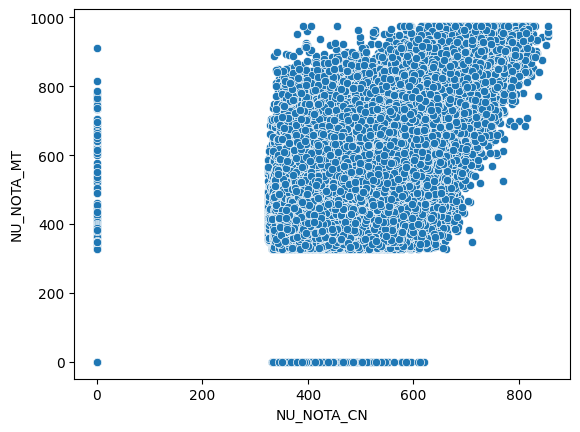

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Cria um DataFrame com as notas de matemática e de ciências da natureza
df = educacao[['NU_NOTA_MT', 'NU_NOTA_CN']]

# Cria um gráfico de dispersão das notas de matemática e de ciências da natureza
sns.scatterplot(x='NU_NOTA_CN', y='NU_NOTA_MT', data=df)


# Salva o gráfico em formato JPEG
plt.savefig('nome_do_arquivo.jpeg', format='jpeg')

# Faz o download do arquivo
from google.colab import files
files.download('nome_do_arquivo.jpeg')

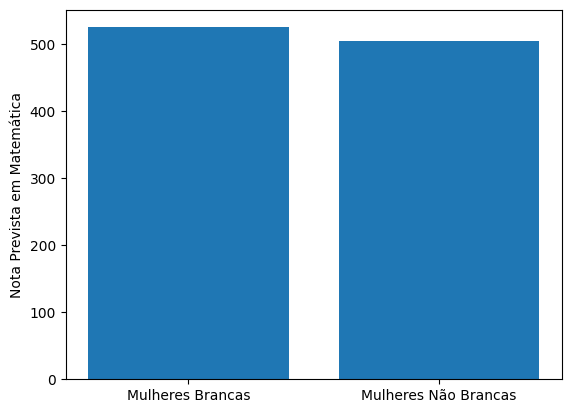

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Filtrar o conjunto de dados para incluir apenas as mulheres
mulheres = educacao.loc[educacao['TP_SEXO_F'] == 1]

# Filtrar o conjunto de dados para incluir apenas as mulheres brancas e não brancas
mulheres_branco = mulheres.loc[mulheres['cor_bool'] == 'branco']
mulheres_nao_branco = mulheres.loc[mulheres['cor_bool'] == 'nao_branco']

# Calcular as notas previstas para as mulheres brancas e não brancas
X_branco = mulheres_branco[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_branco_pred = reg.predict(X_branco)

X_nao_branco = mulheres_nao_branco[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_nao_branco_pred = reg.predict(X_nao_branco)

# Plotar os resultados em um gráfico de barras
labels = ['Mulheres Brancas', 'Mulheres Não Brancas']
y_preds = [y_branco_pred.mean(), y_nao_branco_pred.mean()]

plt.bar(labels, y_preds)
plt.ylabel('Nota Prevista em Matemática')
plt.show()

# Salva o gráfico em formato JPEG
plt.savefig('nome_do_arquivo.jpeg', format='jpeg')

# Faz o download do arquivo
from google.colab import files
files.download('nome_do_arquivo.jpeg')


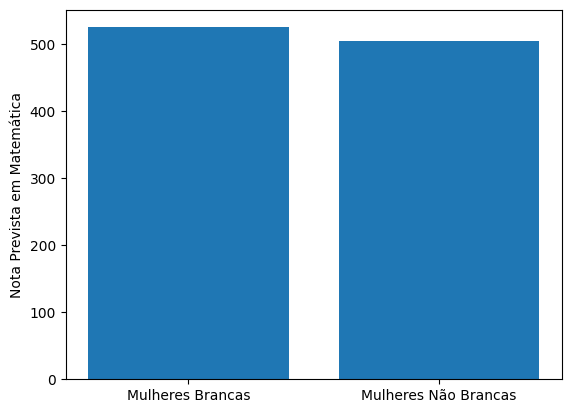

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Filtrar o conjunto de dados para incluir apenas as mulheres
mulheres = educacao.loc[educacao['TP_SEXO_F'] == 1]

# Filtrar o conjunto de dados para incluir apenas as mulheres brancas e não brancas
mulheres_branco = mulheres.loc[mulheres['cor_bool'] == 'branco']
mulheres_nao_branco = mulheres.loc[mulheres['cor_bool'] == 'nao_branco']

# Calcular as notas previstas para as mulheres brancas e não brancas
X_branco = mulheres_branco[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_branco_pred = reg.predict(X_branco)

X_nao_branco = mulheres_nao_branco[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_nao_branco_pred = reg.predict(X_nao_branco)

# Plotar os resultados em um gráfico de barras
labels = ['Mulheres Brancas', 'Mulheres Não Brancas']
y_preds = [y_branco_pred.mean(), y_nao_branco_pred.mean()]

plt.bar(labels, y_preds)
plt.ylabel('Nota Prevista em Matemática')
plt.show()
# Salva o gráfico em formato JPEG
plt.savefig('nome_do_arquivo.jpeg', format='jpeg')

# Faz o download do arquivo
from google.colab import files
files.download('nome_do_arquivo.jpeg')



In [ ]:
educacao_mn = educacao[educacao['cor_bool'] == 'nao_branco']
educacao_mn = educacao_mn[educacao_mn['TP_SEXO_F'] == 1]


In [ ]:
X_test = educacao_mn[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_pred = reg.predict(X_test)


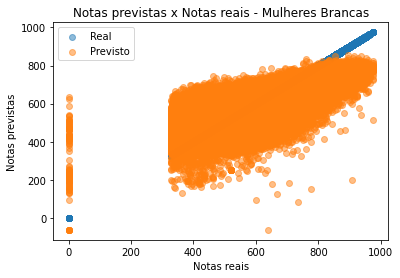

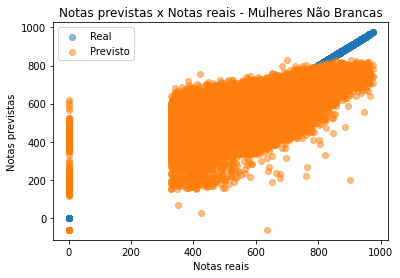

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para mulheres brancas
educacao_branco = educacao[educacao['cor_bool'] == 'branco']
educacao_branco = educacao_branco[educacao_branco['TP_SEXO_F'] == 1]
y_true_branco = educacao_branco['NU_NOTA_MT']
plt.scatter(y_true_branco, y_true_branco, label='Real', alpha=0.5)
plt.scatter(y_true_branco, reg.predict(educacao_branco[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]), label='Previsto', alpha=0.5)
plt.legend()
plt.title('Notas previstas x Notas reais - Mulheres Brancas')
plt.xlabel('Notas reais')
plt.ylabel('Notas previstas')
plt.show()

# Gráfico para mulheres não brancas
y_true_mn = educacao_mn['NU_NOTA_MT']
plt.scatter(y_true_mn, y_true_mn, label='Real', alpha=0.5)
plt.scatter(y_true_mn, y_pred, label='Previsto', alpha=0.5)
plt.legend()
plt.title('Notas previstas x Notas reais - Mulheres Não Brancas')
plt.xlabel('Notas reais')
plt.ylabel('Notas previstas')
plt.show()


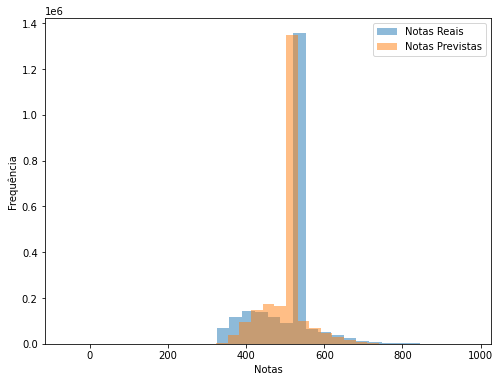

In [ ]:
import matplotlib.pyplot as plt

# Seleciona as notas das mulheres não brancas
notas_mulheres_nao_brancas = educacao.loc[educacao['cor_bool'] == 'nao_branco']
notas_mulheres_nao_brancas = notas_mulheres_nao_brancas.loc[notas_mulheres_nao_brancas['TP_SEXO_F'] == 1]

# Calcula as notas previstas para as mulheres não brancas
X_test_mulheres_nao_brancas = notas_mulheres_nao_brancas[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_pred_mulheres_nao_brancas = reg.predict(X_test_mulheres_nao_brancas)

# Cria o histograma
fig, ax = plt.subplots(figsize=(8, 6))
bins = 30
ax.hist(notas_mulheres_nao_brancas['NU_NOTA_MT'], bins=bins, alpha=0.5, label='Notas Reais')
ax.hist(y_pred_mulheres_nao_brancas, bins=bins, alpha=0.5, label='Notas Previstas')
ax.set_xlabel('Notas')
ax.set_ylabel('Frequência')
ax.legend(loc='upper right')
plt.show()


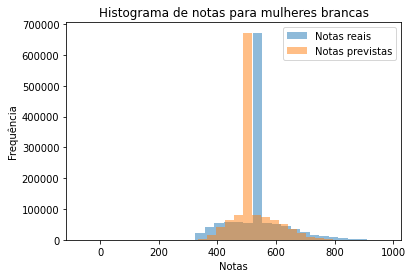

In [ ]:
import matplotlib.pyplot as plt

# Filtra os dados apenas para mulheres brancas
df_wb = educacao.loc[(educacao['TP_SEXO_F'] == 1) & (educacao['cor_bool'] == 'branco')]

# Obtém as notas reais e previstas
y_real_wb = df_wb['NU_NOTA_MT']
y_pred_wb = reg.predict(df_wb[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']])

# Plota o histograma das notas reais
plt.hist(y_real_wb, bins=30, alpha=0.5, label='Notas reais')

# Plota o histograma das notas previstas
plt.hist(y_pred_wb, bins=30, alpha=0.5, label='Notas previstas')

plt.legend(loc='upper right')
plt.title('Histograma de notas para mulheres brancas')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.show()


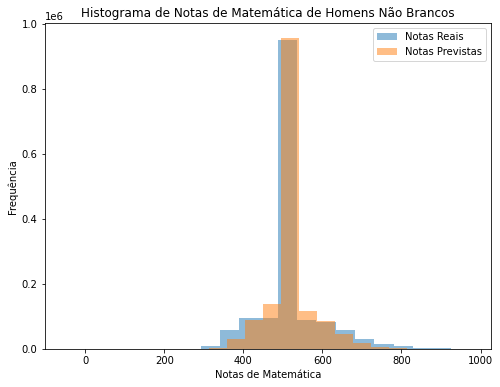

In [ ]:
import matplotlib.pyplot as plt

# Filtro para homens não brancos
filtro_hnb = (educacao['cor_bool'] == 'nao_branco') & (educacao['TP_SEXO_M'] == 1)

# Dados das notas reais e previstas
notas_hnb_reais = y_train.loc[filtro_hnb].values.flatten()
notas_hnb_previstas = reg.predict(X_train.loc[filtro_hnb])

# Plotagem do histograma
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(notas_hnb_reais, bins=20, alpha=0.5, label='Notas Reais')
ax.hist(notas_hnb_previstas, bins=20, alpha=0.5, label='Notas Previstas')
ax.set_xlabel('Notas de Matemática')
ax.set_ylabel('Frequência')
ax.set_title('Histograma de Notas de Matemática de Homens Não Brancos')
ax.legend()
plt.show()


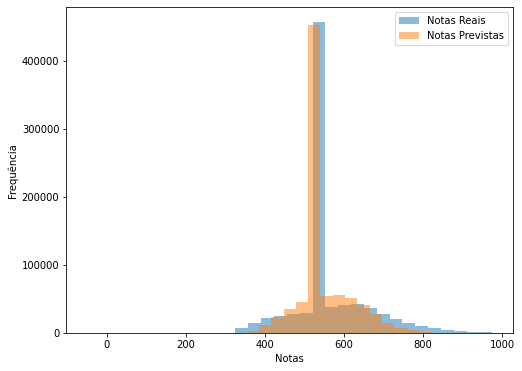

In [ ]:
import matplotlib.pyplot as plt

# Seleciona as notas dos homens brancos
notas_homens_brancos = educacao.loc[educacao['cor_bool'] == 'branco']
notas_homens_brancos = notas_homens_brancos.loc[notas_homens_brancos['TP_SEXO_M'] == 1]

# Calcula as notas previstas para os homens brancos
X_test_homens_brancos = notas_homens_brancos[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO_F', 'TP_SEXO_M']]
y_pred_homens_brancos = reg.predict(X_test_homens_brancos)

# Cria o histograma
fig, ax = plt.subplots(figsize=(8, 6))
bins = 30
ax.hist(notas_homens_brancos['NU_NOTA_MT'], bins=bins, alpha=0.5, label='Notas Reais')
ax.hist(y_pred_homens_brancos, bins=bins, alpha=0.5, label='Notas Previstas')
ax.set_xlabel('Notas')
ax.set_ylabel('Frequência')
ax.legend(loc='upper right')
plt.show()


In [ ]:
# Transforma a coluna cor_bool em variáveis dummy
dummy_cor = pd.get_dummies(educacao['cor_bool'], prefix='cor')

# Concatena as variáveis dummy ao dataset
educacao = pd.concat([educacao, dummy_cor], axis=1)

# Remove a coluna original cor_bool
educacao = educacao.drop('cor_bool', axis=1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Criação do modelo
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predição das notas de matemática
y_pred = model.predict(X_test)


NameError: ignored

In [ ]:
# Cria um dicionário com os grupos e as respectivas notas médias em cada área
grupos_notas_medias = {}
for grupo in grupos:
    grupo_educacao = educacao.loc[educacao['cor_bool'] == grupo]
    grupos_notas_medias[grupo] = [grupo_educacao['NU_NOTA_MT'].mean(),
                                  grupo_educacao['NU_NOTA_CN'].mean(),
                                  grupo_educacao['NU_NOTA_CH'].mean(),
                                  grupo_educacao['NU_NOTA_LC'].mean()]

# Converte o dicionário em um dataframe para facilitar a visualização
grupos_notas_medias_df = pd.DataFrame.from_dict(grupos_notas_medias, orient='index',
                                                columns=['Média Matemática', 'Média Ciências da Natureza',
                                                         'Média Ciências Humanas', 'Média Linguagens e Códigos'])

# Exibe o dataframe
print(grupos_notas_medias_df)


NameError: ignored

In [ ]:
import seaborn as sns

# carregar os dados do ENEM e do índice de vulnerabilidade social
educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
                        error_bad_lines=False,
                        sep=';',
                        encoding='ISO-8859-1',
                        usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"])
vulnerabilidade = pd.read_csv('caminho_para_o_arquivo_do_indice_de_vulnerabilidade_social.csv')

# mesclar os dados do ENEM com o índice de vulnerabilidade social
dados = educacao.merge(vulnerabilidade, on='NU_INSCRICAO')

# adicionar uma coluna para indicar se o candidato é branco ou não
def cor_func(row):
    if row['TP_COR_RACA'] == 0 or row['TP_COR_RACA'] == 2 or row['TP_COR_RACA'] == 3 or row['TP_COR_RACA'] == 4:
        return 'nao_branco'
    else:
        return 'branco'

dados['cor'] = dados.apply(cor_func, axis=1)

# plotar o gráfico de dispersão
sns.scatterplot(data=dados, x='indice_de_vulnerabilidade_social', y='NU_NOTA_MT', hue='cor')


In [ ]:
educacao['genero'] = np.where(educacao['TP_SEXO'] == 'F', 'F', 'M')
educacao['cor'] = np.where(educacao['TP_COR_RACA'] == 0, 'nao_branco', 'branco')

def categoriza_nivel_educacional(educ):
    if educ == 'A':
        return 'Nunca estudou'
    elif educ == 'B':
        return 'Não completou a 4ª série/5º ano do Ensino Fundamental'
    elif educ == 'C':
        return 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental'
    elif educ == 'D':
        return 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio'
    elif educ == 'E':
        return 'Completou o Ensino Médio, mas não completou a Faculdade'
    elif educ == 'F':
        return 'Completou a Faculdade, mas não completou a Pós-graduação'
    elif educ == 'G':
        return 'Completou a Pós-graduação'
    elif educ == 'H':
        return 'Não sei'

educacao['escolaridade_mae'] = educacao['Q002'].apply(categoriza_nivel_educacional)
educacao['escolaridade_pai'] = educacao['Q001'].apply(categoriza_nivel_educacional)

educacao['grupo'] = educacao['genero'] + '_' + educacao['cor']



KeyError: ignored

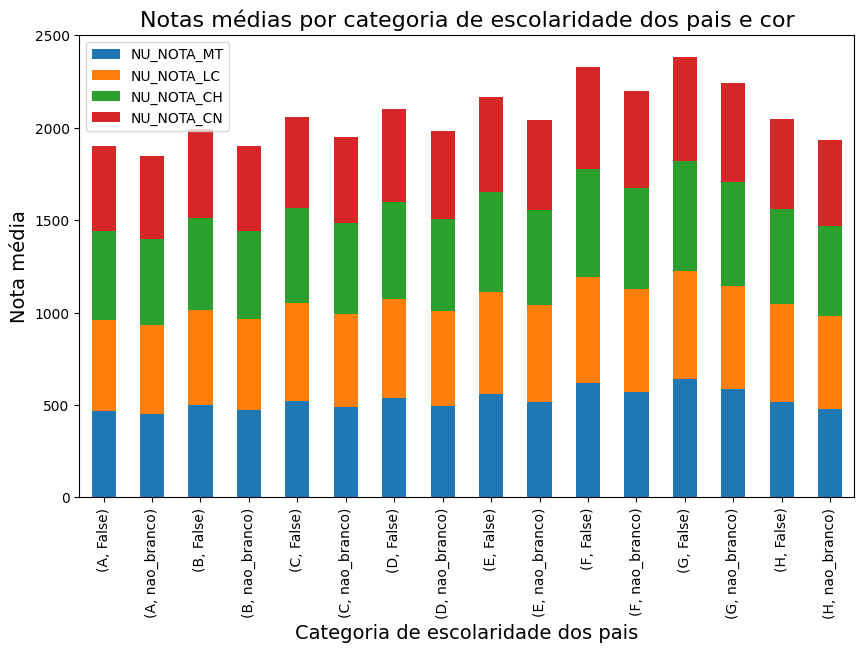

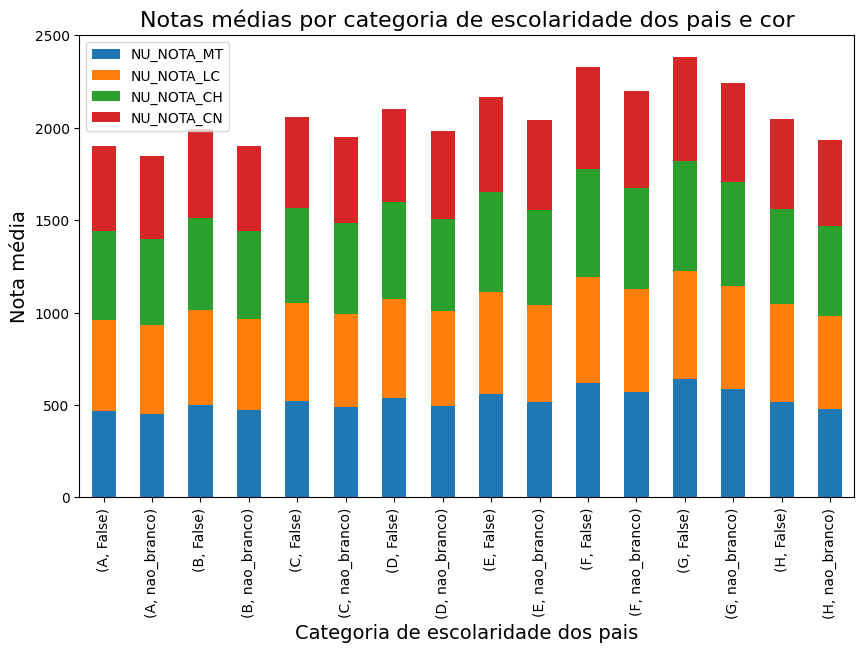

In [ ]:
import matplotlib.pyplot as plt

# Agrupa as notas pela categoria de escolaridade dos pais e cor
grouped = educacao.groupby(['Q001', 'cor_bool']).mean()[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']]

# Cria um gráfico de barras empilhadas com as notas médias por categoria de escolaridade e cor
grouped.plot.bar(stacked=True, figsize=(10, 6))

# Configura o título e os rótulos dos eixos
plt.title('Notas médias por categoria de escolaridade dos pais e cor', fontsize=16)
plt.xlabel('Categoria de escolaridade dos pais', fontsize=14)
plt.ylabel('Nota média', fontsize=14)

# Mostra o gráfico
plt.show()
import matplotlib.pyplot as plt

# Agrupa as notas pela categoria de escolaridade dos pais e cor
grouped = educacao.groupby(['Q001', 'cor_bool']).mean()[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']]

# Cria um gráfico de barras empilhadas com as notas médias por categoria de escolaridade e cor
grouped.plot.bar(stacked=True, figsize=(10, 6))

# Configura o título e os rótulos dos eixos
plt.title('Notas médias por categoria de escolaridade dos pais e cor', fontsize=16)
plt.xlabel('Categoria de escolaridade dos pais', fontsize=14)
plt.ylabel('Nota média', fontsize=14)

# Mostra o gráfico
plt.show()


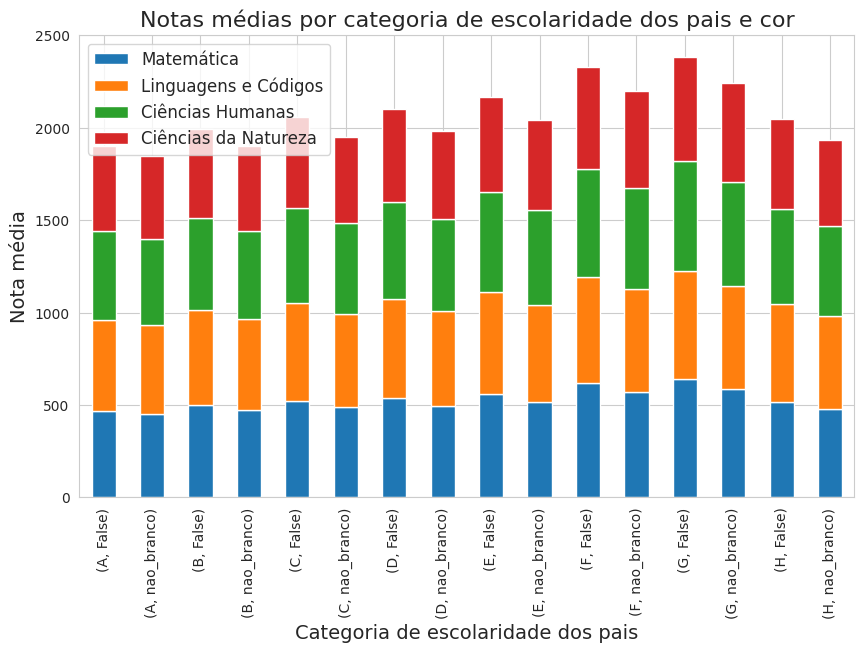

In [ ]:
import matplotlib.pyplot as plt

# Agrupa as notas pela categoria de escolaridade dos pais e cor
grouped = educacao.groupby(['Q001', 'cor_bool']).mean()[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']]

# Cria um gráfico de barras empilhadas com as notas médias por categoria de escolaridade e cor
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configura o título e os rótulos dos eixos
ax.set_title('Notas médias por categoria de escolaridade dos pais e cor', fontsize=16)
ax.set_xlabel('Categoria de escolaridade dos pais', fontsize=14)
ax.set_ylabel('Nota média', fontsize=14)

# Configura a legenda
ax.legend(['Matemática', 'Linguagens e Códigos', 'Ciências Humanas', 'Ciências da Natureza'], fontsize=12)

# Mostra o gráfico
plt.show()


In [ ]:
#agrupar escolaridades
notas_por_cor_escolaridade = educacao.groupby(['cor_bool', 'Q001', 'Q002']).mean()[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']].reset_index()


In [ ]:
# Define a escala ordinal para a escolaridade
escolaridade_ord = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7}
educacao["Q001_ord"] = educacao["Q001"].map(escolaridade_ord)
educacao["Q002_ord"] = educacao["Q002"].map(escolaridade_ord)

# Combina a escolaridade do pai e da mãe em uma única variável
educacao["escolaridade_pais"] = educacao["Q001_ord"] + educacao["Q002_ord"]

# Mapeia a variável de cor para nomes mais intuitivos
cor_nome = {0: "Não branco", 1: "Branco"}
educacao["TP_COR_RACA_nome"] = educacao["TP_COR_RACA"].map(cor_nome)

# Agrupa os dados por cor, gênero e escolaridade combinada dos pais
grupos = educacao.groupby(["TP_COR_RACA_nome", "escolaridade_pais"])

# Calcula a média das notas para cada grupo
medias = grupos.mean()


In [ ]:
print(educacao.columns)


Index(['NU_NOTA_CN', 'Q001', 'Q002'], dtype='object')


In [ ]:
import matplotlib.pyplot as plt


educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002"]
)


# Transforma a variável TP_SEXO em binária
educacao = pd.get_dummies(educacao, columns=['TP_SEXO'])

import seaborn as sn

import swifter
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco'== 5;
    return val

educacao['cor_bool'] = educacao.swifter.apply(my_func, axis=1)

#imputer = SimpleImputer(strategy='mean')
educacao = educacao.dropna()


# Cria os 4 grupos
grupos = ['F_branco', 'F_nao_branco', 'M_branco', 'M_nao_branco']



# Filtra o DataFrame para selecionar mulheres não brancas
mulheres_nao_brancas = educacao[(educacao['TP_COR_RACA'] == 2) | (educacao['TP_COR_RACA'] == 3) | (educacao['TP_COR_RACA'] == 4)]

# Seleciona as colunas necessárias
colunas = ['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'Q001', 'Q002', 'Q006' 'TP_SEXO_F']
mulheres_nao_brancas = mulheres_nao_brancas[colunas]

# Cria a nova coluna 'educacao_pais'
mapa_educacao = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': np.nan
}

mulheres_nao_brancas['educacao_pais'] = (mulheres_nao_brancas['Q001'] + mulheres_nao_brancas['Q002']).replace(mapa_educacao)

# Cria o gráfico de dispersão
plt.scatter(mulheres_nao_brancas['educacao_pais'], mulheres_nao_brancas['NU_NOTA_MT'])
plt.xlabel('Educação dos pais')
plt.ylabel('Nota de matemática')
plt.title('Relação entre as notas das mulheres não brancas e a escolaridade dos pais')
plt.show()



Pandas Apply:   0%|          | 0/5783109 [00:00<?, ?it/s]

KeyError: ignored

In [ ]:
educacao['Q001_formacao'] = educacao['Q001'].apply(lambda x: 'formado' if x in ['F', 'G'] else 'nao_formado')
educacao['Q002_formacao'] = educacao['Q002'].apply(lambda x: 'formado' if x in ['F', 'G'] else 'nao_formado')


<ipython-input-2-c53e8ae00fc2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educacao_mulheres_nao_branco['Formacao_Pais'] = educacao_mulheres_nao_branco.apply(lambda x: 'Formados' if (x['Q001'].startswith('F') or x['Q002'].startswith('F')) else 'Nao Formados', axis=1)


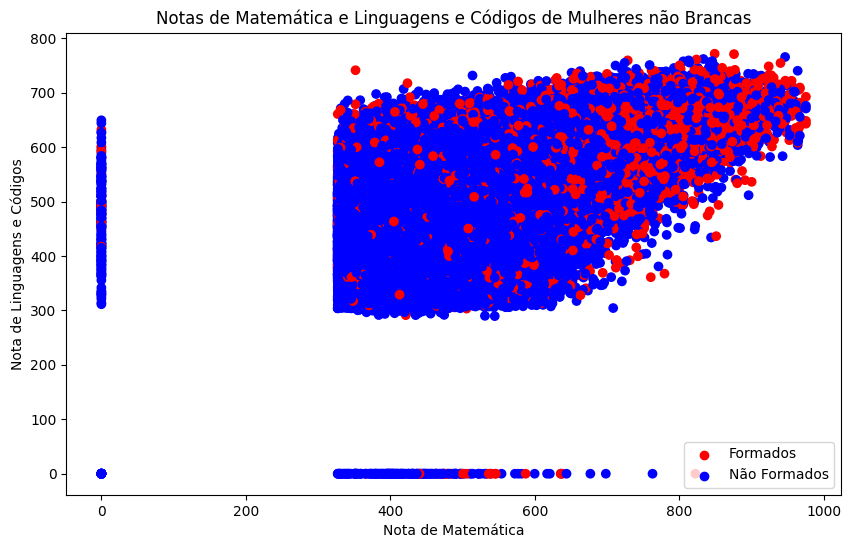

In [ ]:
import matplotlib.pyplot as plt

# Filtra o dataframe para considerar apenas mulheres não brancas
educacao_mulheres_nao_branco = educacao[(educacao['TP_COR_RACA'].isin([0, 2, 3, 4])) & (educacao['TP_SEXO_F'] == 1)]

# Cria uma nova coluna "Formacao_Pais" com valores "Formados" e "Nao Formados"
educacao_mulheres_nao_branco['Formacao_Pais'] = educacao_mulheres_nao_branco.apply(lambda x: 'Formados' if (x['Q001'].startswith('F') or x['Q002'].startswith('F')) else 'Nao Formados', axis=1)

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x=educacao_mulheres_nao_branco['NU_NOTA_MT'], y=educacao_mulheres_nao_branco['NU_NOTA_LC'], c=educacao_mulheres_nao_branco['Formacao_Pais'].map({'Formados': 'red', 'Nao Formados': 'blue'}))
plt.xlabel('Nota de Matemática')
plt.ylabel('Nota de Linguagens e Códigos')
plt.title('Notas de Matemática e Linguagens e Códigos de Mulheres não Brancas')
red_patch = plt.scatter([],[], c='red')
blue_patch = plt.scatter([],[], c='blue')
plt.legend((red_patch, blue_patch), ('Formados', 'Não Formados'), loc='lower right')

plt.show()


<ipython-input-65-3345d53ba3f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homens_nao_brancos['pais_formados'] = homens_nao_brancos.apply(lambda row: 'formados' if row['Q001'].startswith('F') or row['Q002'].startswith('F') else 'nao_formados', axis=1)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


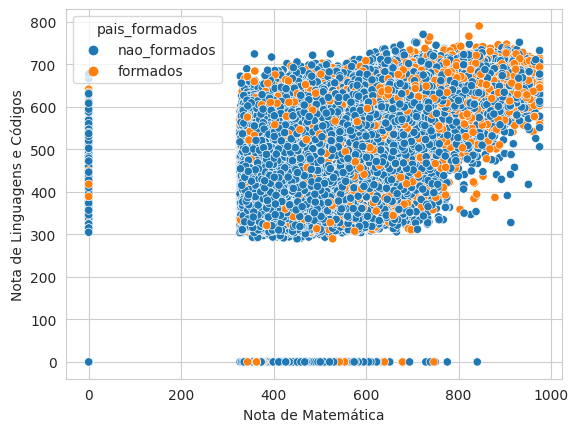

In [ ]:
# Filtra os dados para homens não brancos
homens_nao_brancos = educacao[(educacao['TP_COR_RACA'] != 1) & (educacao['TP_SEXO_M'] == 1)]

# Cria uma nova coluna 'pais_formados' que indica se os pais têm ensino superior completo ou não
homens_nao_brancos['pais_formados'] = homens_nao_brancos.apply(lambda row: 'formados' if row['Q001'].startswith('F') or row['Q002'].startswith('F') else 'nao_formados', axis=1)

# Plota o gráfico de dispersão
sn.scatterplot(x='NU_NOTA_MT', y='NU_NOTA_LC', hue='pais_formados', data=homens_nao_brancos)

# Adiciona os títulos aos eixos x e y
plt.xlabel('Nota de Matemática')
plt.ylabel('Nota de Linguagens e Códigos')

# Exibe o gráfico
plt.show()


In [ ]:
# Cria subconjunto de mulheres brancas e não-brancas
#mulheres_branco = educacao[(educacao['cor_bool'] == 'branco') & (educacao['TP_SEXO_F'] == 1)]
#mulheres_nao_branco = educacao[(educacao['cor_bool'] == 'nao_branco') & (educacao['TP_SEXO_F'] == 1)]

# Comparação da distribuição das notas de matemática entre mulheres brancas e não-brancas
#sn.boxplot(data=[mulheres_branco['NU_NOTA_MT'], mulheres_nao_branco['NU_NOTA_MT']], palette="Set3")


In [ ]:
# Cria o grupo de mulheres brancas
grupo_branco = educacao[(educacao['cor_bool'] == 'branco') & (educacao['TP_SEXO_F'] == 1)]

# Verifica se há amostras suficientes
if len(grupo_branco) > 0:
    # Separa as variáveis independentes e dependentes
    X_branco = grupo_branco[['NU_NOTA_LC', 'Q025']]
    y_branco = grupo_branco['NU_NOTA_MT']
    X_branco, y_branco = shuffle(X_branco, y_branco)

    # Ajusta o modelo de regressão linear
    modelo_branco = LinearRegression().fit(X_branco, y_branco)

    # Realiza a previsão para as notas de matemática
    y_pred_branco = modelo_branco.predict(X_branco)

    # Plota o gráfico de dispersão e a linha de regressão linear
    sn.regplot(x=X_branco['NU_NOTA_LC'], y=y_branco, color='blue', line_kws={'color': 'red'})
    plt.xlabel('Nota de Linguagens e Códigos')
    plt.ylabel('Nota de Matemática')
    plt.title('Mulheres Brancas')
    plt.show()
else:
    print('Não há amostras suficientes para o grupo de mulheres brancas')


Não há amostras suficientes para o grupo de mulheres brancas


In [ ]:
educacao['Q025'] = (educacao['Q025'] == 'B').astype(int)


<ipython-input-11-adfbaa716855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educacao['Q025'] = (educacao['Q025'] == 'B').astype(int)


In [ ]:
model_mb = LinearRegression().fit(mulheres_branco[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']], mulheres_branco['Q025_bool'])
model_mnb = LinearRegression().fit(mulheres_nao_branco[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN']], mulheres_nao_branco['Q025_bool'])


KeyError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao11 = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q003", "Q002", "Q005", "Q025", "Q071"]
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


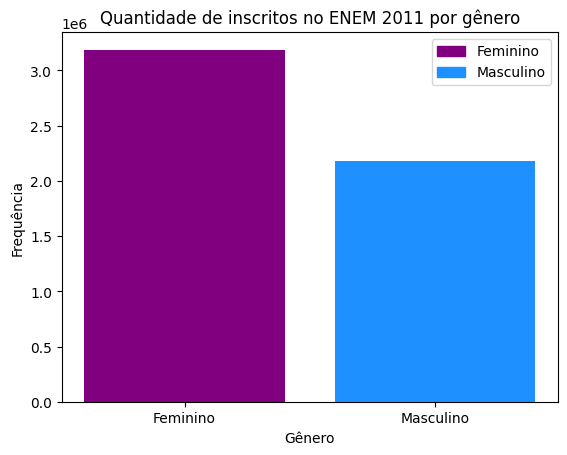

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria um dataframe com os dados
data = educacao11['TP_SEXO'].value_counts()

# Plota o gráfico de barras da quantidade de inscritos por gênero
plt.bar(['Feminino', 'Masculino'], data, color=['#800080', '#1E90FF'])
plt.title('Quantidade de inscritos no ENEM 2011 por gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')

# Adiciona legenda com as cores correspondentes
colors = {'Feminino': '#800080', 'Masculino': '#1E90FF'}
legend_elements = [plt.Rectangle((0,0), 1, 1, color=colors[key]) for key in colors]
plt.legend(legend_elements, colors.keys())

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria um dataframe com os dados
data = educacao11['TP_SEXO'].value_counts()

# Plota o gráfico de barras da quantidade de inscritos por gênero
plt.bar(['Feminino', 'Masculino'], data, color=['#800080', '#1E90FF'])
plt.title('Quantidade de inscritos no ENEM 2011 por gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')

# Adiciona legenda com as cores correspondentes
colors = {'Feminino': '#800080', 'Masculino': '#1E90FF'}
legend_elements = [plt.Rectangle((0,0), 1, 1, color=colors[key]) for key in colors]
plt.legend(legend_elements, colors.keys())

plt.show()


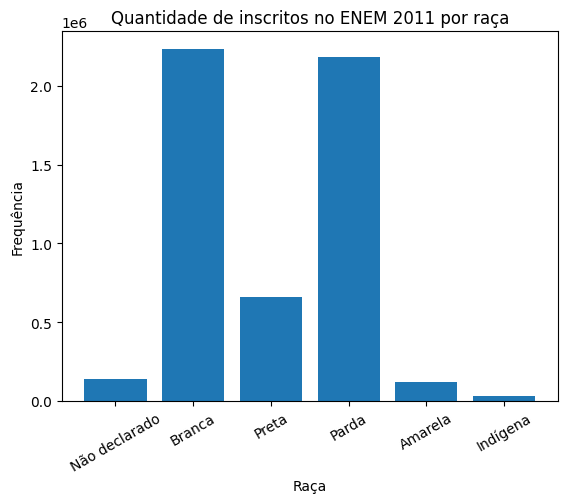

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define os rótulos dos ticks do eixo x
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Plota o histograma da quantidade de inscritos por raça
plt.hist(educacao11['TP_COR_RACA'], bins=6, range=(0,6), align='left', rwidth=0.8)
plt.xticks(range(6), labels, rotation=30) # adiciona os rótulos no eixo x
plt.title('Quantidade de inscritos no ENEM 2011 por raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


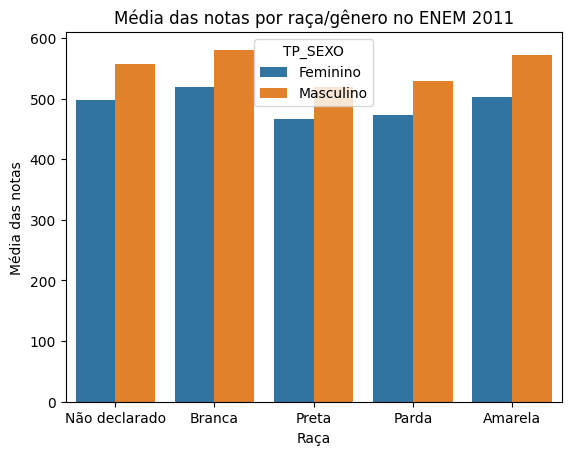

In [ ]:
import seaborn as sns

# Calcula a média da nota de cada grupo
media_notas_2011 = educacao11.groupby(['TP_SEXO', 'TP_COR_RACA'])['NU_NOTA_MT'].mean()

# Transforma em um dataframe para facilitar a manipulação
media_notas_2011 = pd.DataFrame(media_notas_2011)

# Reseta o índice do dataframe para utilizar as colunas 'TP_SEXO' e 'TP_COR_RACA'
media_notas_2011 = media_notas_2011.reset_index()

# Mapeia os valores dos códigos para as respectivas descrições
media_notas_2011['TP_SEXO'] = media_notas_2011['TP_SEXO'].map({ 'F': 'Feminino', 'M': 'Masculino' })
media_notas_2011['TP_COR_RACA'] = media_notas_2011['TP_COR_RACA'].map({ 0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela' })

# Plota o gráfico de barras
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO', data=media_notas_2011)
plt.title('Média das notas por raça/gênero no ENEM 2011')
plt.xlabel('Raça')
plt.ylabel('Média das notas')
plt.show()


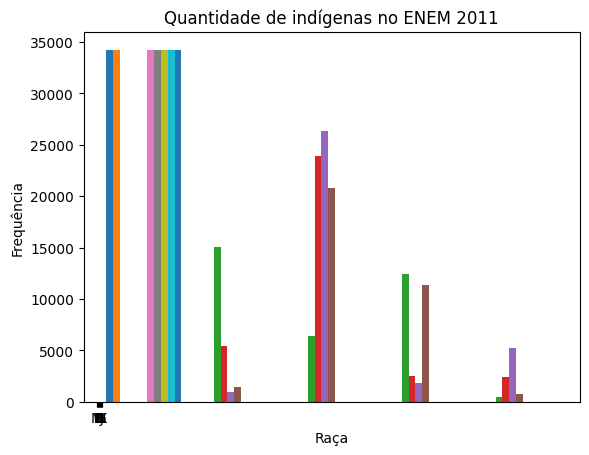

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtra apenas as informações dos indígenas
indigenas11 = educacao11.loc[educacao11['TP_COR_RACA'] == 5]

# Plota o histograma da quantidade de indígenas
plt.hist(indigenas11, bins=5)
plt.title('Quantidade de indígenas no ENEM 2011')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


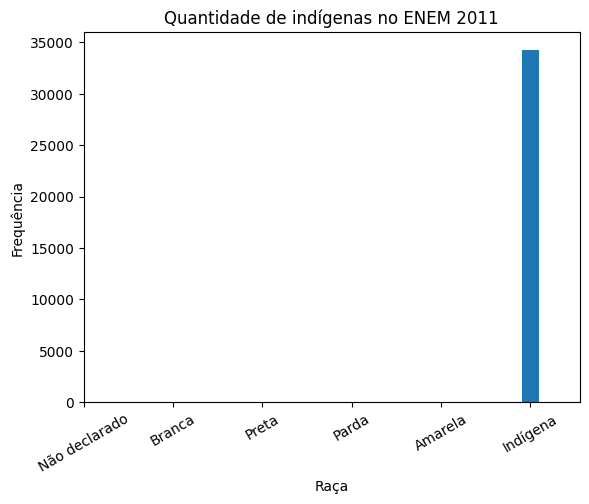

In [ ]:
# Define os rótulos dos ticks do eixo x
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Plota o histograma da quantidade de indígenas
plt.hist(indigenas11['TP_COR_RACA'], bins=5)
plt.xticks(range(6), labels, rotation=30) # adiciona os rótulos no eixo x
plt.title('Quantidade de indígenas no ENEM 2011')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


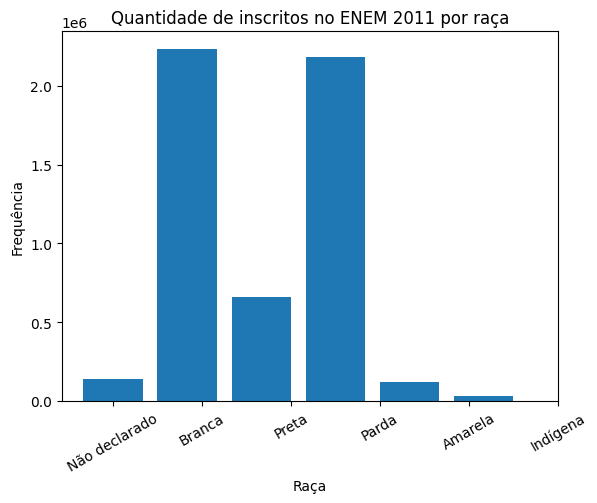

In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lê os dados do ENEM 2011

# Define os rótulos dos ticks do eixo x
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Plota o histograma da quantidade de inscritos por raça
plt.hist(educacao11['TP_COR_RACA'], bins=6, range=(0,5), align='left', rwidth=0.8)
plt.xticks(range(6), labels, rotation=30) # adiciona os rótulos no eixo x
plt.title('Quantidade de inscritos no ENEM 2011 por raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


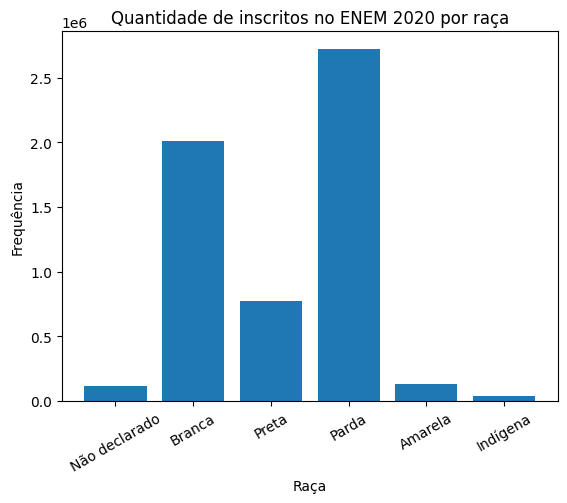

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê apenas as colunas necessárias do arquivo CSV
cols = ['TP_COR_RACA']
educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', usecols=cols, sep=';', encoding='ISO-8859-1', error_bad_lines=False)

# Define os rótulos dos ticks do eixo x
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Plota o histograma da quantidade de inscritos por raça
plt.hist(educacao['TP_COR_RACA'], bins=6, range=(0,6), align='left', rwidth=0.8)
plt.xticks(range(6), labels, rotation=30) # adiciona os rótulos no eixo x
plt.title('Quantidade de inscritos no ENEM 2020 por raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


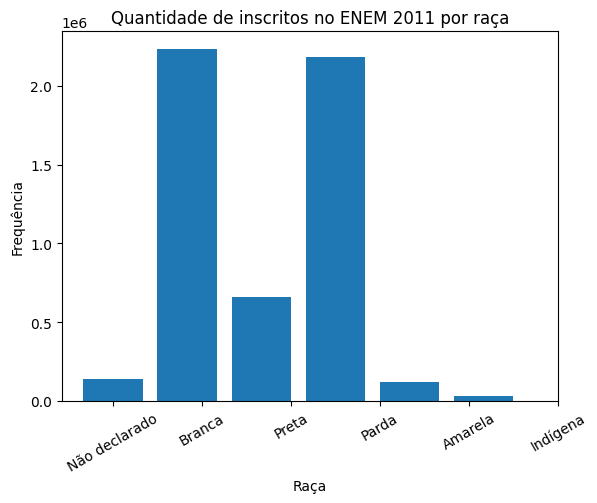

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define os rótulos dos ticks do eixo x
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Plota o histograma da quantidade de inscritos por raça
plt.hist(educacao11['TP_COR_RACA'], bins=6, range=(0,5), align='left', rwidth=0.8)
plt.xticks(range(6), labels, rotation=30) # adiciona os rótulos no eixo x
plt.title('Quantidade de inscritos no ENEM 2011 por raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


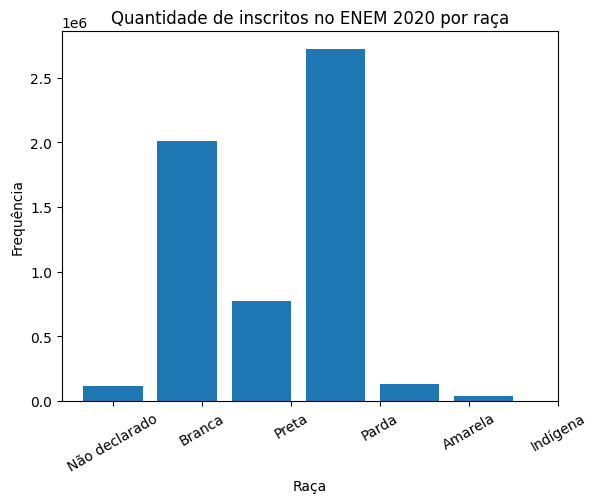

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define os rótulos dos ticks do eixo x
labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

# Plota o histograma da quantidade de inscritos por raça
plt.hist(educacao['TP_COR_RACA'], bins=6, range=(0,5), align='left', rwidth=0.8)
plt.xticks(range(6), labels, rotation=30) # adiciona os rótulos no eixo x
plt.title('Quantidade de inscritos no ENEM 2020 por raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()


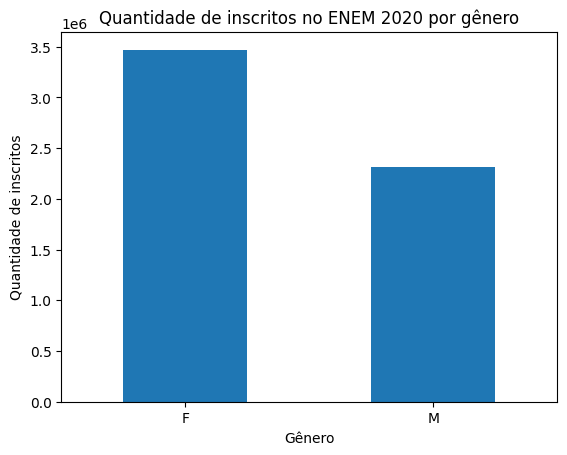

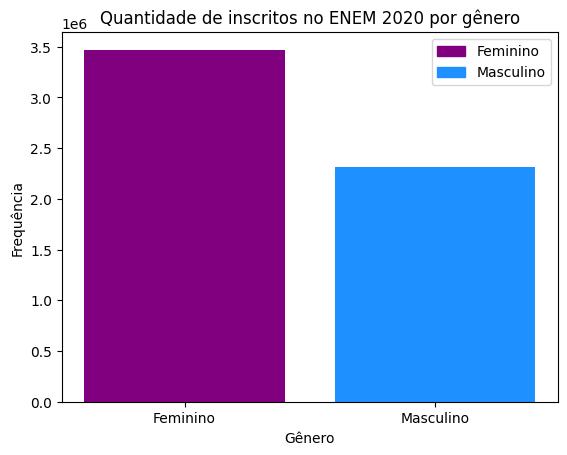

In [ ]:
# Lê apenas as colunas necessárias do arquivo CSV
cols = ['TP_SEXO']
educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', usecols=cols, sep=';', encoding='ISO-8859-1', error_bad_lines=False)
# Criação do gráfico de barras para a quantidade de inscritos por gênero
genero_counts = educacao['TP_SEXO'].value_counts()
genero_counts.plot(kind='bar', rot=0)

# Adição de rótulos e título ao gráfico
plt.xlabel('Gênero')
plt.ylabel('Quantidade de inscritos')
plt.title('Quantidade de inscritos no ENEM 2020 por gênero')

# Exibição do gráfico
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Cria um dataframe com os dados
data = educacao['TP_SEXO'].value_counts()

# Plota o gráfico de barras da quantidade de inscritos por gênero
plt.bar(['Feminino', 'Masculino'], data, color=['#800080', '#1E90FF'])
plt.title('Quantidade de inscritos no ENEM 2020 por gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')

# Adiciona legenda com as cores correspondentes
colors = {'Feminino': '#800080', 'Masculino': '#1E90FF'}
legend_elements = [plt.Rectangle((0,0), 1, 1, color=colors[key]) for key in colors]
plt.legend(legend_elements, colors.keys())

plt.show()





In [ ]:
educacao11.columns

Index(['TP_SEXO', 'TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'Q002', 'Q003', 'Q005', 'Q025', 'Q071'],
      dtype='object')

In [ ]:
educacao.head


<bound method NDFrame.head of          TP_COR_RACA
0                  2
1                  3
2                  3
3                  3
4                  3
...              ...
5783104            1
5783105            1
5783106            1
5783107            1
5783108            3

[5783109 rows x 1 columns]>

<ipython-input-40-8540db9a769e>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', usecols=cols, sep=';', encoding='ISO-8859-1', error_bad_lines=False)


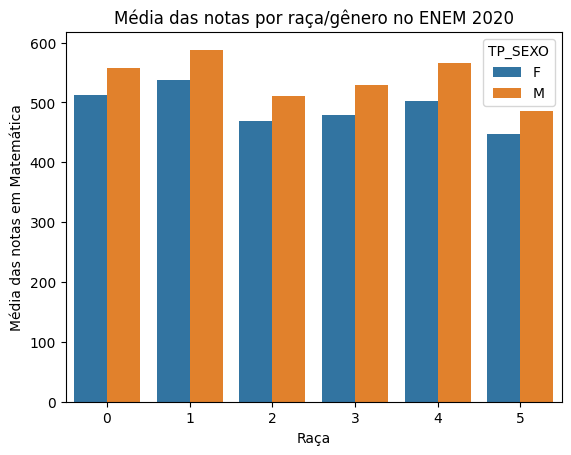

In [ ]:
cols = ['TP_COR_RACA', 'TP_SEXO', "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002", "Q006", "Q025"]

educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', usecols=cols, sep=';', encoding='ISO-8859-1', error_bad_lines=False)



# Calcula a média da nota de cada grupo
media_notas_2020 = educacao.groupby(['TP_SEXO', 'TP_COR_RACA'])['NU_NOTA_MT'].mean()

# Transforma em um dataframe para facilitar a manipulação
media_notas_2020 = pd.DataFrame(media_notas_2020)

# Reseta o índice
media_notas_2020 = media_notas_2020.reset_index()

# Plota o gráfico de barras
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO', data=media_notas_2020)
plt.title('Média das notas por raça/gênero no ENEM 2020')
plt.xlabel('Raça')
plt.ylabel('Média das notas em Matemática')
plt.show()


In [ ]:
educacao.columns


Index(['TP_SEXO'], dtype='object')

In [ ]:
import pandas as pd

# Carrega o dataframe de 2020
educacao_2020 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA'])

# Transforma a variável TP_SEXO em binária
educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()

# Carrega o dataframe de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA'])

# Transforma a variável TP_SEXO em binária
educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()


In [ ]:
# Agrupa o dataframe por grupos e calcula a média das notas para cada grupo
medias = educacao.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'cor_bool']).mean()

# Calcula a diferença entre as médias
dif_medias = medias.max() - medias.min()

# Imprime a diferença entre as médias
print(dif_medias)


KeyError: ignored

In [ ]:
educacao.head()

,TP_SEXO_F,TP_SEXO_M,RAÇA,NOTA_MT
5,1,0.0,3,526.7
8,1,0.0,3,448.5
11,0,1.0,1,546.5
18,1,0.0,3,420.3
19,0,1.0,2,405.6


In [ ]:
educacao11.head()


,TP_SEXO_F,RAÇA,NOTA_MT
0,M,1,737.1
1,F,1,NaN
2,M,1,467.8
3,M,1,406.7
4,M,3,769.3
